# Ant Colony Optimisation 

Dataset: d200-511.tsp

3 May 2024

---


## Introduction
<br>
<p>The purpose of this report is to explore the Traveling Salesman Problem (TSP) using the Ant Colony Optimisation (ACO) algorithm, focusing on how different parameters influence the behavior of ants in choosing trails and affecting distances. Additionally, we obtained the optimal results from these experiments and compared them with the results obtained from Genetic Algorithm (GA) experiments conducted in link below:</p>  

[experimenting_GA_to solve_TSP](https://github.com/PixieParksie/UniProjects/tree/main/GeneticAlgorithm)

<br>

<p><strong>Heuristic Strength:</strong> We investigated the impact of heuristic strength by experimenting with/tuning parameters (alpha and beta), which determine ants' preference for following stronger pheromone trails versus shorter distances.</p>

<p><strong>Pheromone Evaporation Rate:</strong> To understand the effect of the pheromone evaporation rate, we experimented with/tuned two parameters (del_tau and rho), controlling pheromone accumulation and evaporation on the trails.</p>
<br>

## Initial Parameters

<p>We utilised default parameters provided in the Week 6 task 2:</p>

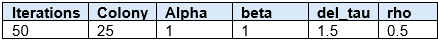

<p>We ran the experiments 6 times (n=6), as we believe this number allows for observing trends, variations, and the general behaviour of the algorithm without excessively taxing computational resources, which is sufficient for initial exploration and experimentation.</p>
<br>
<br>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def initializeAnts(cities, colony):
    return np.random.randint(cities.shape[0], size = colony)


def inverseDistances(cities):
    # A 2-dimensional array of zeros
    distances = np.zeros((cities.shape[0], cities.shape[0]))

    # Calculate distance between nodes
    for index, point in enumerate(cities):
        distances[index] = np.sqrt(((cities - point) ** 2).sum(axis = 1))

    with np.errstate(all = 'ignore'):    # Floating-point error handling - Setted to known state
        inv_distances = 1 / distances    # invert distances
    inv_distances[inv_distances == np.inf] = 0    # Replace infinity by zero to prevent zero division error

    return inv_distances

In [9]:
def moveAnts(cities, positions, inv_distances, pheromones, alpha, beta, del_tau):
    # Initialize an array to store the paths taken by each ant
    paths = np.zeros((cities.shape[0], positions.shape[0]), dtype = int) - 1

    # Initial position at node zero 
    paths[0] = positions

    # For nodes after start to end
    for node in range(1, cities.shape[0]):
        # For each ant
        for ant in range(positions.shape[0]):
            # Probability to travel the nodes
            next_location_probability = (inv_distances[positions[ant]] ** alpha + pheromones[positions[ant]] ** beta /
                                            inv_distances[positions[ant]].sum() ** alpha + pheromones[positions[ant]].sum() ** beta)

            # Index to maximum probability node
            next_position = np.argwhere(next_location_probability == np.amax(next_location_probability))[0][0]

            # Check if node has already been visited
            while next_position in paths[:, ant]:
                # Replace the probability of visited to zero
                next_location_probability[next_position] = 0.0

                # Find the maximum probability node
                next_position = np.argwhere(next_location_probability == np.amax(next_location_probability))[0][0]

            # Add node to path
            paths[node, ant] = next_position

            # Update pheromones (releasing pheromones)
            pheromones[node, next_position] = pheromones[node, next_position] + del_tau

    # Paths taken by the ants
    return np.swapaxes(paths, 0, 1)

In [10]:
def runAcoTsp(cities, iterations, colony, alpha, beta, del_tau, rho):
    
    inv_distances = inverseDistances(cities)
    inv_distances = inv_distances ** beta    # Add beta algorithm parameter to inverted distances

    # Initialize pheromones to zero, path to nothing
    pheromones = np.zeros((cities.shape[0], cities.shape[0]))
    min_distance = None
    min_path = None

    # For the number of iterations
    for i in range(iterations):
        positions = initializeAnts(cities, colony)    # Randomly place ants
        paths = moveAnts(cities, positions, inv_distances, pheromones, alpha, beta, del_tau)    # Find a path

        pheromones *= (1 - rho)    # Evaporate pheromones

        # [3] For each path
        for path in paths:
            distance = 0
            
            # For each node from second to last
            for node in range(1, path.shape[0]):
                # Calculate distance to the last node
                distance += np.sqrt(((cities[int(path[node])] - cities[int(path[node - 1])]) ** 2).sum())

            # Update minimun distance and path if less nor non existent
            if not min_distance or distance < min_distance:
                min_distance = distance
                min_path = path

    # Copy and append first node to end of minimum path to form closed path
    min_path = np.append(min_path, min_path[0])

    # Return tuple
    return (min_path, min_distance)

In [11]:
# Functions to get tsp data

def getTspData(tsp):
    # Open input file
    infile = open(tsp, 'r')

    # Read instance
    name = infile.readline().strip().split()[1]                     # NAME
    type = infile.readline().strip().split()[1]                     # TYPE
    comment = infile.readline().strip().split()[1]                  # COMMENT
    dimension = infile.readline().strip().split()[1]                # DIMENSION
    edge_weight_type = infile.readline().strip().split()[1]         # EDGE_WEIGHT_TYPE
    node_coord_section = []                                         # NODE_COORD_SECTION
    infile.readline()

    # Read node coord section and store its x, y coordinates
    for i in range(0, int(dimension)):
        x, y = infile.readline().strip().split()[0:]
        node_coord_section.append([float(x), float(y)])

    # Close input file
    infile.close()

    # File as dictionary
    return {
        'name': name,
        'type': type,
        'comment': comment,
        'dimension': dimension,
        'edge_weight_type': edge_weight_type,
        'node_coord_section': node_coord_section
    }

def displayTspHeaders(dict):
    print('\nName: ', dict['name'])
    print('Type: ', dict['type'])
    print('Comment: ', dict['comment'])
    print('Dimension: ', dict['dimension'])
    print('Edge Weight Type: ', dict['edge_weight_type'], '\n')

## Q1. What are the effects of the heuristic strength on the quality of solutions obtained from ACO? Give some plausible reasons to support your observations. 


Name:  d200-51
Type:  TSP
Comment:  d200-51
Dimension:  200
Edge Weight Type:  N/A 



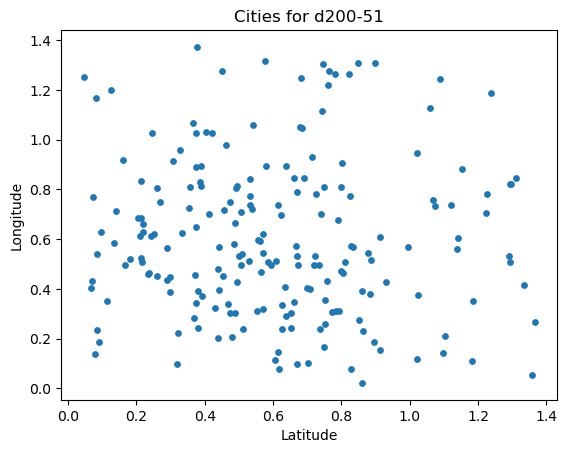

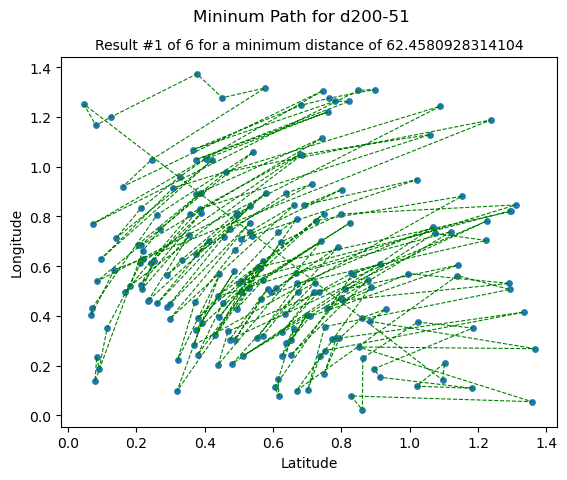

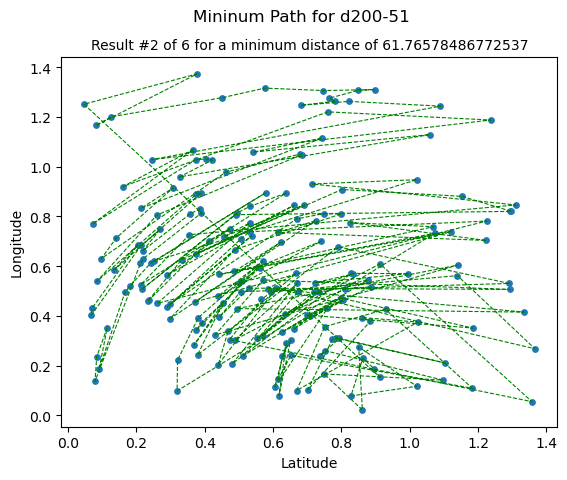

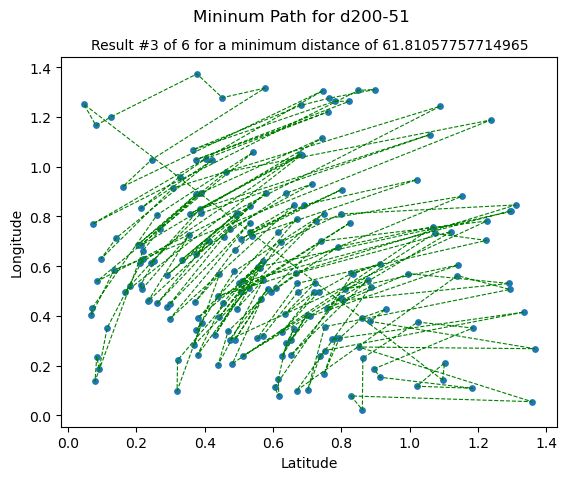

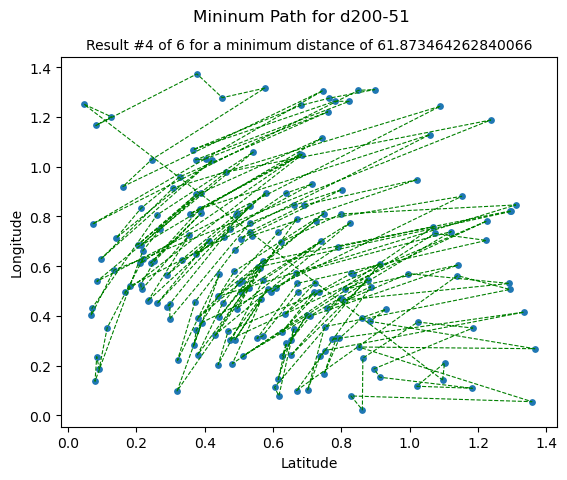

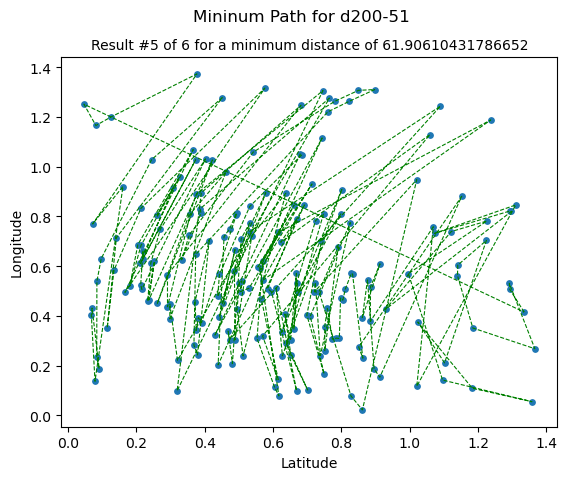

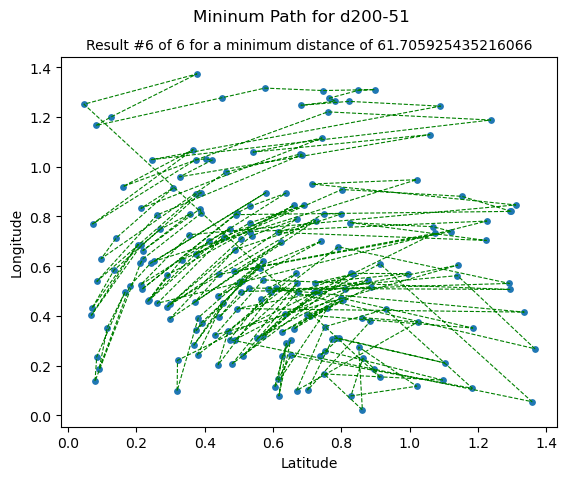

Min Distance Average for the last 6 results is 61.91999154870134


In [7]:
# Read data
TSP = getTspData('d200-51.tsp')
displayTspHeaders(TSP)
cities = np.array(TSP['node_coord_section'])


plt.scatter(cities[:, 0], cities[:, 1], s = 15)
plt.title('Cities for {}'.format(TSP['name']))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
plt.close()

iterations = 50
colony = 25
alpha = 1
beta = 1
del_tau = 1.5
rho = 0.5

n = 2       
average = 0 

for i in range(n):
    min_path, min_distance = runAcoTsp(cities, iterations, colony, alpha, beta, del_tau, rho)
    average += min_distance
    
    plt.scatter(cities[:, 0], cities[:, 1], marker='o', s=15)
    plt.plot(cities[min_path, 0], cities[min_path, 1], c='g', linewidth=0.8, linestyle="--")
    plt.suptitle('Mininum Path for {}'.format(TSP['name']))
    plt.title('Result #{} of {} for a minimum distance of {}'.format(i + 1, n, min_distance), fontsize = 10)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
        
    plt.show()
    plt.close()
    
print('Min Distance Average for the last {} results is {}'.format(n, average/n))

<br>

Q1. What are the effects of the heuristic strength on the quality of solutions obtained from ACO? Give some plausible reasons to support your observations.

<br>

<p>Fixed parameters: del_tau=1.5, rho=0.5</p>

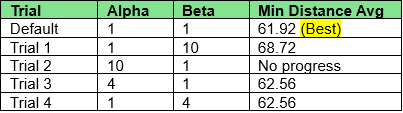


<p>Results Summary:</p>
<ul>
  Trial 1: Maximised beta only (68.72).<br>
  Trial 2: Maximising alpha to 10 resulted in no output due to prolonged computation.<br>
  Trial 3: Decreased alpha to 4, resulting in improvement (62.56).<br>
  Trial 4: Interchanged alpha (1) and beta (4) with the same result as Trial 3.<br>
</ul>
<p>Observations:</p>
<ul>
  <li>Higher alpha led to longer computation time without progress.</li>
  <li>Closer proximity between alpha and beta values yielded better results.</li>
  <li>Equal values for alpha and beta produced the optimal outcome.</li>
  <li>So far, the default parameter brings the best result.</li>
</ul>

## Q2. What are the effects of the pheromone evaporation rate on the quality of the solutions obtained from ACO? Give some plausible reasons to support your observations.


Name:  d200-51
Type:  TSP
Comment:  d200-51
Dimension:  200
Edge Weight Type:  N/A 



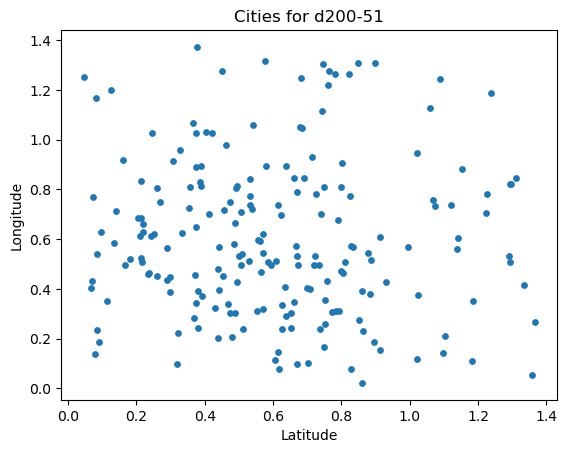

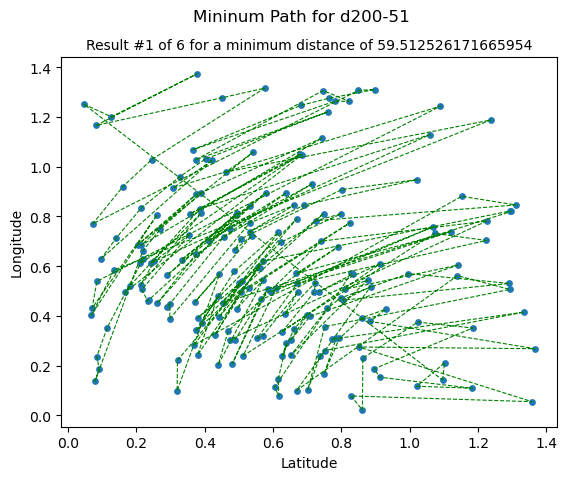

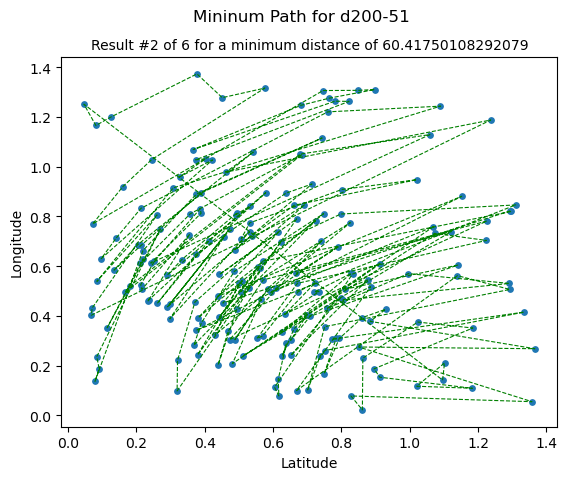

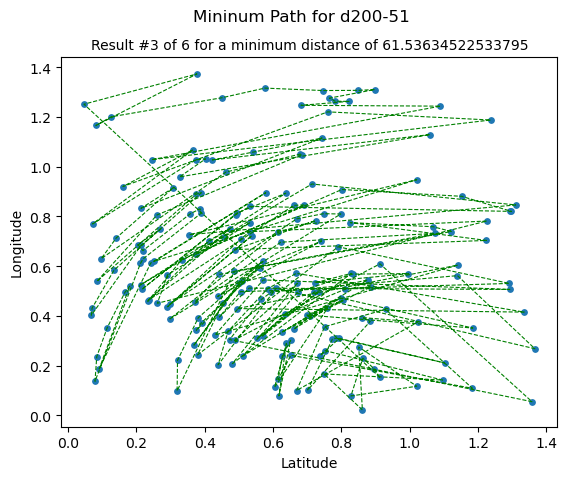

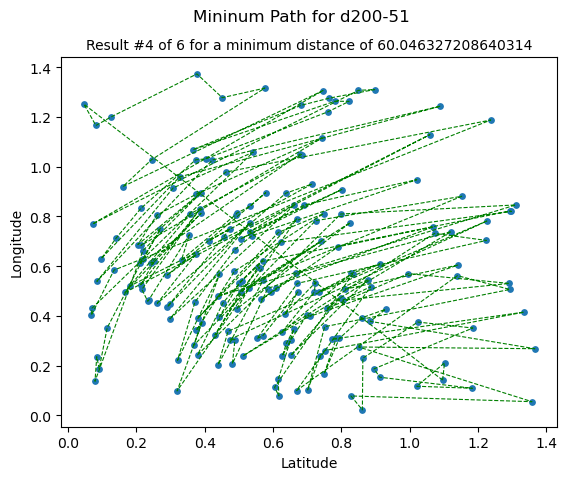

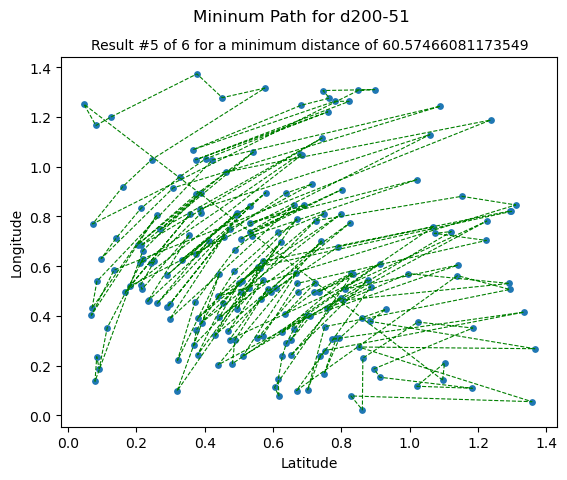

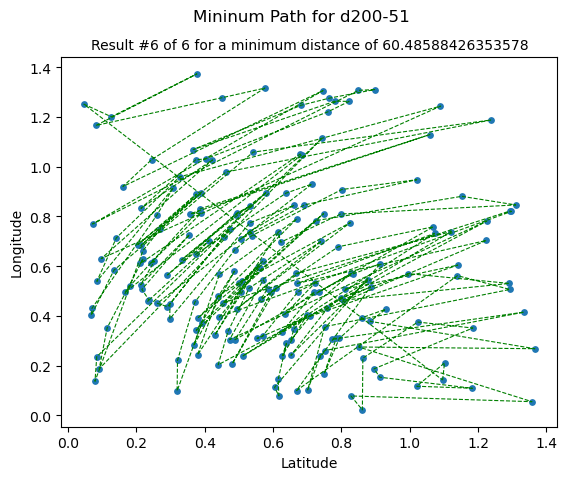

Min Distance Average for the last 6 results is 60.42887412730605


In [6]:
TSP = getTspData('d200-51.tsp')
displayTspHeaders(TSP)
cities = np.array(TSP['node_coord_section'])

plt.scatter(cities[:, 0], cities[:, 1], s = 15)
plt.title('Cities for {}'.format(TSP['name']))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
plt.close()

iterations = 50
colony = 25
alpha = 1.5
beta = 0.5
del_tau = 7
rho = 0.5

n = 6        
average = 0  

for i in ran
    min_path, min_distance = runAcoTsp(cities, iterations, colony, alpha, beta, del_tau, rho)
    average += min_distance
    
    plt.scatter(cities[:, 0], cities[:, 1], marker='o', s=15)
    plt.plot(cities[min_path, 0], cities[min_path, 1], c='g', linewidth=0.8, linestyle="--")
    plt.suptitle('Mininum Path for {}'.format(TSP['name']))
    plt.title('Result #{} of {} for a minimum distance of {}'.format(i + 1, n, min_distance), fontsize = 10)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
        
    plt.show()
    plt.close()
    
print('Min Distance Average for the last {} results is {}'.format(n, average/n))

<br>

Q2. What are the effects of the pheromone evaporation rate on the quality of the solutions obtained from ACO? Give some plausible reasons to support your observations.

<br>

<p>Fixed parameters: alpha=1, beta=1</p>

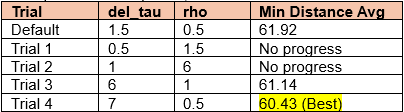

<p>Summary:</p>
<ul>
  Trial 1: When the del_tau value was decreased to 0.5 and the rho value was increased to 1.5, no progress was made. <br>
  Trial 2: Minimising a del_tau value of 1 and maximising rho value of 6 also resulted in no progress. <br>
  Trial 3: Then, maximising del_tau (6) and minimising rho (1) resulted in 61.14. <br>
  Trial 4: Increasing del_tau and decreasing rho brings the best outcome by far 60.43. <br>
</ul>
<br>
<p>Observations:</p>
<ul>
  <li>When rho is set above 1, it results in longer computational times (with no output even after waiting 10+ hours).</li>
  <li>We observed that a higher difference between del_tau and rho tends to yield better outcomes. This suggests that a higher accumulation rate and a lower evaporation rate leads ants to deposit more pheromone on the trails, which can facilitate exploration of alternative paths and potentially lead to finding more optimal solutions.</li>
</ul>


## Improving results gained from Q1 and Q2


Name:  d200-51
Type:  TSP
Comment:  d200-51
Dimension:  200
Edge Weight Type:  N/A 



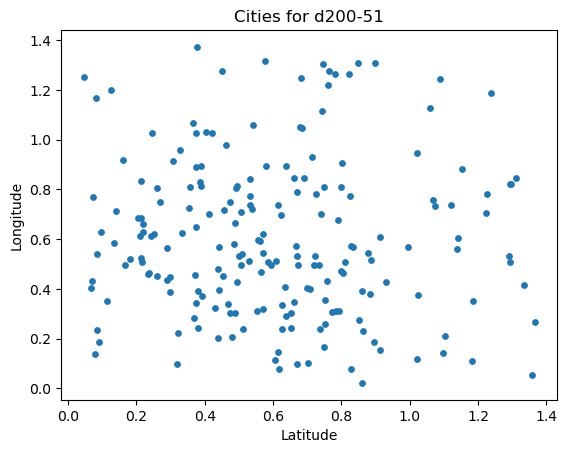

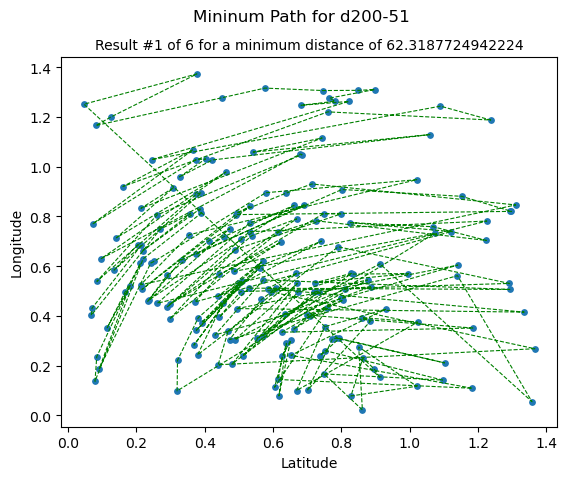

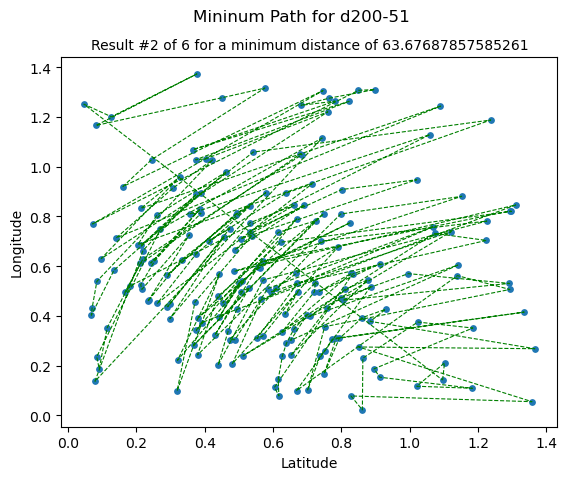

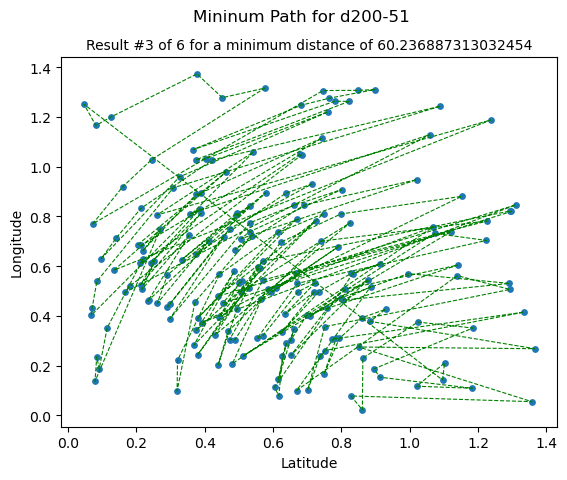

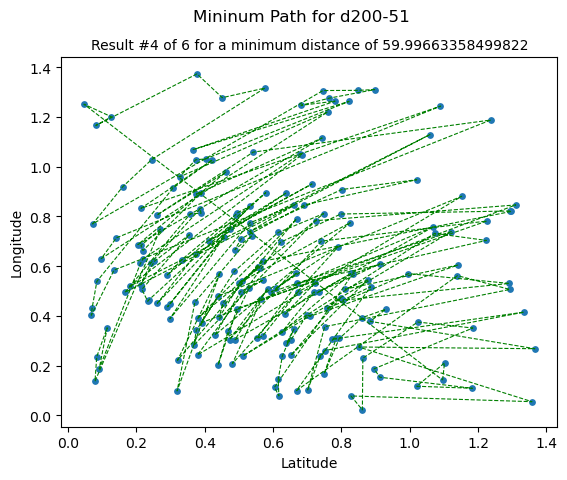

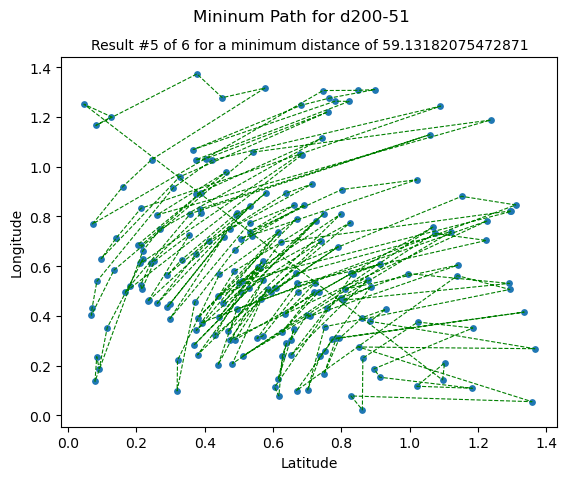

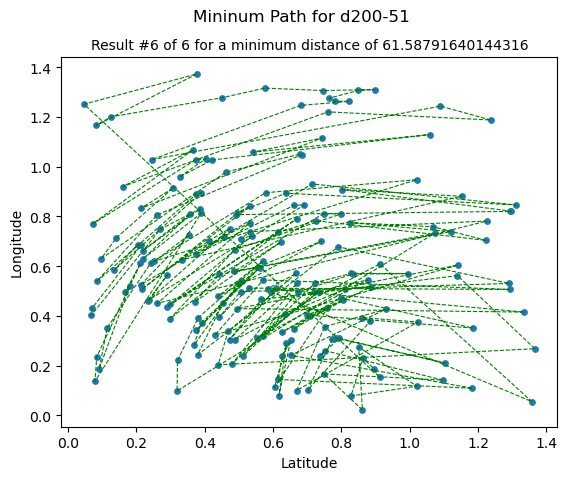

Min Distance Average for the last 6 results is 61.15815152071293


In [12]:
# Read data
TSP = getTspData('d200-51.tsp')
displayTspHeaders(TSP)
cities = np.array(TSP['node_coord_section'])


plt.scatter(cities[:, 0], cities[:, 1], s = 15)
plt.title('Cities for {}'.format(TSP['name']))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
plt.close()

iterations = 50
colony = 25
alpha = 1
beta = 0.7
del_tau = 1.3
rho = 0.05

n = 6        
average = 0  

for i in range(n):
    min_path, min_distance = runAcoTsp(cities, iterations, colony, alpha, beta, del_tau, rho)
    average += min_distance
    
    plt.scatter(cities[:, 0], cities[:, 1], marker='o', s=15)
    plt.plot(cities[min_path, 0], cities[min_path, 1], c='g', linewidth=0.8, linestyle="--")
    plt.suptitle('Mininum Path for {}'.format(TSP['name']))
    plt.title('Result #{} of {} for a minimum distance of {}'.format(i + 1, n, min_distance), fontsize = 10)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
        
    plt.show()
    plt.close()
    
print('Min Distance Average for the last {} results is {}'.format(n, average/n))

<br>
<p> <strong> Best parameters from Q1 & Q2: alpha=1, beta=1, del_tau=7, rho=0.5 (Min Distance Avg: 60.43)</strong></p>

<p>In earlier findings, we gained the best result of 60.43. However, del_tau value of 7 is relatively high for 200 instances (cities), which lead to aggressive pheromone updates potentially biasing the search towards exploitation of local optima. 

We conducted additional experiments to identify more balanced parameter values that could lead to better outcomes: </p>

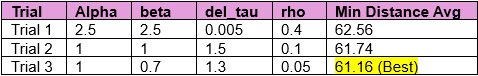

<ul>
    
Trial 1: Ants heavily consider both pheromone trails and distances between cities when making decisions. A small del_tau value (0.005) and a moderate rho value (0.4) balances exploration and exploitation in the search for optimal or near-optimal solutions to the Traveling Salesman Problem. 

<br>
    
Trial 2: The new combination of parameter values balances better between exploration and exploitation than trial 2. 
With moderate pheromone deposition and faster evaporation rate, Trial 3 may facilitate more efficient search and improved result. 
    
<br>
    
Trial 3: beta reduced to 0.7, so that ants can proiritise heuristic information. Also, with significantly faster pheromone evaporation rate, it encourages more exploration and diversity in the paths considered by the ants, potentially leading to better solutions. <br>
</ul>

<br>

<p>Given the results, we believe that Trial 3 (61.16) as potentially being the best result. Although the result from the default parameters has the lowest average minimum distance of 60.2, the potential drawbacks associated with the high del_tau value might outweigh its marginal improvement in performance. Hence, Trial 3 with its more balanced parameter values, particularly the moderate del_tau value, may be considered the better result overall.</p>
<br>

## Q3. Compare the best results you have obtained using GA and ACO. Comment on your findings.

<p>Summary of the results obtained from the GA:</p>

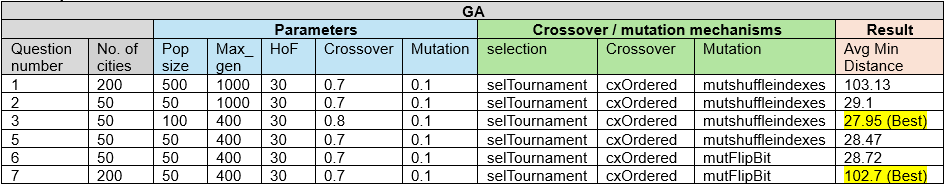

<p>GA experiment involving 50 cities. The best score achieved was 27.95, whereas for the experiment with 200 cities, the best score was 102.7.
 
<br>   
    
In our GA experiment, we tested various parameters using two different sets of cities, one with 200 cities and the other with 50. The findings revealed that reducing the number of cities had a substantial effect on the algorithm's ability to find shorter distances, with a decrease of approx. 70%. However, altering parameters or the mechanisms for crossover and mutation did not notably affect the reduction in minimum distance. </p>


<br>
<br>

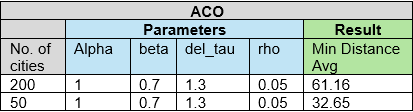

With the ACO approach, we observed a reduction in the city size resulting in a minimum distance average drop of almost 50%, which is comparatively less than what was achieved with the Genetic Algorithm (GA). This is due to its ability to explore various solutions through randomness. In smaller cities, GA efficiently exploits advantageous paths, leading to notable distance reductions.

<br>
<br>
<p><strong>Comparing computational time based on 50 cities:</strong></p>

<p>GA:</p>



<ACO>ACO:</ACO>



<br>

<p>ACO typically outperforms GA in runtime because once pheromones accumulate in a path, ants tend to follow it, leading to quicker convergence. In contrast, GA's random approach leads to changing optimal paths in each generation due to the variation introduced by random selection, crossover, and mutation operations, which cause the exploration of different areas of the solution space (Nohaidda Binti Sariff & Norlida Buniyamin, 2009).</p>

<br>
<br>
<strong>Conclusions: </strong>

The conclusions drawn from the testing and analysis of both algorithms are as follows:

- ACO outperforms GA significantly, achieving a minimum distance average of 61.16 compared to GA's 102.7 (based on 200 cities).

- Highly unbalanced pheromone accumulation and evaporation rates yield great outcome but lack reliability.

- Reducing the number of cities (from 200 to 20) has a substantial impact on both algorithms, leading to significantly shorter distances.

- When the city count is decreased, ACO shows a 50% reduction in minimum distance average, whereas GA demonstrates a larger reduction of 70%.

- ACO converge faster than GA due to the ant’s tendency to follow pheromone path.

- For this specific dataset, ACO proves superior to GA. However, it's important to note that ACO's superiority over GA isn't universally guaranteed across all datasets.

<br>
<br>

## References

Sariff, N. B., & Buniyamin, N. (2010). Genetic algorithm versus ant colony optimization algorithm - Comparison of performances in robot path planning application. Proceedings of the 7th International Conference on Informatics in Control, Automation and Robotics, 10. https://doi.org/10.5220/0002892901250132